In [40]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
all_files = glob.glob("./data/*.csv")
li = []

In [42]:
for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    temp_name = filename.replace('.csv','')
    parts = temp_name.split('_')
    data_month_year = '_'.join(parts[-2:])
    df['dataDate'] = data_month_year
    li.append(df)

In [43]:
df_master = pd.concat(li, axis=0, ignore_index=True)
print(df_master.head())
print(df_master.info())

                                 id      city          type  squareMeters  \
0  2a1a6db97ff122d6bc148abb6f0e498a  szczecin  blockOfFlats          52.0   
1  368e16142922433c709e6921a3b8f2a8  szczecin  blockOfFlats          70.0   
2  655acd54eb518a718fd1f59fd7161c61  szczecin  blockOfFlats          43.0   
3  99f85bbc55d110aa5a79ad4c7d5a0562  szczecin  blockOfFlats          46.7   
4  601b83a79fb6b89fe8e488bfcdd5e872  szczecin           NaN          56.2   

   rooms  floor  floorCount  buildYear   latitude  longitude  ...  \
0    2.0    3.0         3.0     2008.0  53.460535  14.545416  ...   
1    3.0    7.0        11.0     1985.0  53.378485  14.657089  ...   
2    2.0    3.0         3.0     1960.0  53.425946  14.559489  ...   
3    2.0    1.0         4.0     1980.0  53.446990  14.556851  ...   
4    3.0    1.0         4.0        NaN  53.441100  14.549100  ...   

     ownership  buildingMaterial  condition  hasParkingSpace  hasBalcony  \
0  condominium             brick        NaN   

In [44]:
df_master.to_csv('./data/master/master_apartaments_data_raw.csv', index=False, encoding='utf-8')

In [45]:
numeric_cols = ['squareMeters','rooms','floor', 'floorCount','buildYear','latitude','longitude',
                'centreDistance','postOfficeDistance','kindergartenDistance','restaurantDistance','collegeDistance', 'pharmacyDistance']

for col in numeric_cols:
    df_master[col] = pd.to_numeric(df_master[col], errors='coerce')

print(df_master[col].info())

<class 'pandas.core.series.Series'>
RangeIndex: 53442 entries, 0 to 53441
Series name: pharmacyDistance
Non-Null Count  Dtype  
--------------  -----  
53387 non-null  float64
dtypes: float64(1)
memory usage: 417.6 KB
None


In [46]:
missing_percent = (df_master.isnull().sum()/len(df_master)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

condition               72.523483
buildingMaterial        40.814341
buildYear               26.860896
type                    22.830358
floor                   12.250664
hasElevator              5.447027
floorCount               1.867445
collegeDistance          1.234984
restaurantDistance       0.190861
pharmacyDistance         0.102915
clinicDistance           0.059878
kindergartenDistance     0.044908
postOfficeDistance       0.031810
schoolDistance           0.014969
dtype: float64


In [47]:
impute_unknown_cols = ['condition','buildingMaterial','type','hasElevator']
df_master['buildYear'].fillna(-1, inplace=True)
df_master['floor'].fillna(-1, inplace=True)
df_master['floorCount'].fillna(-1, inplace=True)
df_master['squareMeters'].fillna(-1, inplace=True)

for col in impute_unknown_cols:
    df_master[col].fillna('Unknown', inplace=True)

print(df_master.head(5))

                                 id      city          type  squareMeters  \
0  2a1a6db97ff122d6bc148abb6f0e498a  szczecin  blockOfFlats          52.0   
1  368e16142922433c709e6921a3b8f2a8  szczecin  blockOfFlats          70.0   
2  655acd54eb518a718fd1f59fd7161c61  szczecin  blockOfFlats          43.0   
3  99f85bbc55d110aa5a79ad4c7d5a0562  szczecin  blockOfFlats          46.7   
4  601b83a79fb6b89fe8e488bfcdd5e872  szczecin       Unknown          56.2   

   rooms  floor  floorCount  buildYear   latitude  longitude  ...  \
0    2.0    3.0         3.0     2008.0  53.460535  14.545416  ...   
1    3.0    7.0        11.0     1985.0  53.378485  14.657089  ...   
2    2.0    3.0         3.0     1960.0  53.425946  14.559489  ...   
3    2.0    1.0         4.0     1980.0  53.446990  14.556851  ...   
4    3.0    1.0         4.0       -1.0  53.441100  14.549100  ...   

     ownership  buildingMaterial  condition  hasParkingSpace  hasBalcony  \
0  condominium             brick    Unknown   

C:\Users\jonie\AppData\Local\Temp\ipykernel_912\1687779575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master['buildYear'].fillna(-1, inplace=True)
C:\Users\jonie\AppData\Local\Temp\ipykernel_912\1687779575.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [48]:
distance_cols = ['collegeDistance', 'restaurantDistance', 'pharmacyDistance', 'clinicDistance',
                 'kindergartenDistance', 'postOfficeDistance', 'schoolDistance']

for col in distance_cols:
    median_val = df_master[col].median()
    df_master[col].fillna(median_val, inplace=True)

print(df_master[distance_cols].head(5))

   collegeDistance  restaurantDistance  pharmacyDistance  clinicDistance  \
0            2.200               0.229             0.307           1.049   
1            0.971               0.068             0.086           0.111   
2            0.405               0.016             0.338           0.730   
3            1.562               0.258             0.096           0.715   
4            0.732               0.367             0.050           0.223   

   kindergartenDistance  postOfficeDistance  schoolDistance  
0                 0.674               0.595           0.753  
1                 0.071               0.317           0.300  
2                 0.114               0.589           0.072  
3                 0.248               0.744           0.196  
4                 0.215               0.148           0.126  


C:\Users\jonie\AppData\Local\Temp\ipykernel_912\646661260.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master[col].fillna(median_val, inplace=True)
C:\Users\jonie\AppData\Local\Temp\ipykernel_912\646661260.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [49]:
print(df_master.isnull().sum().sum())

0


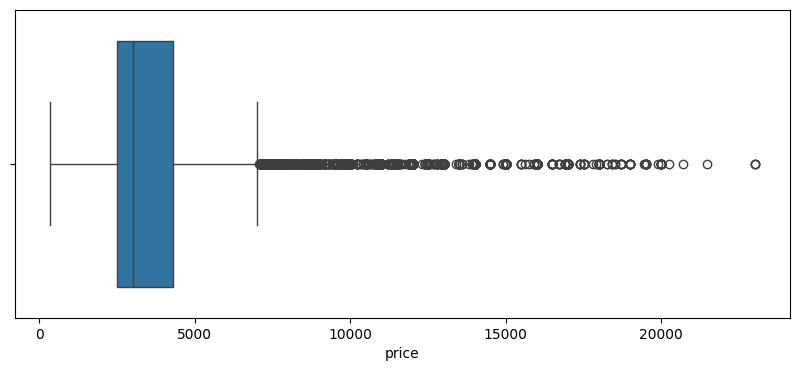

count    53442.000000
mean      3816.597320
std       2359.932028
min        346.000000
25%       2500.000000
50%       3000.000000
75%       4300.000000
max      23000.000000
Name: price, dtype: float64


In [50]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_master['price'])
plt.show()
print(df_master['price'].describe())

In [51]:
Q1 = df_master['price'].quantile(0.25)
Q3 = df_master['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_price = Q1 - 1.5 * IQR
upper_bound_price = Q3 + 1.5 * IQR

df_master_filtered = df_master[
    (df_master['price'] >= lower_bound_price) &
    (df_master['price'] <= upper_bound_price)
].copy()

print(len(df_master) - len(df_master_filtered))
df_master = df_master_filtered


4212


In [52]:
initial_rows = len(df_master)
df_master = df_master[
    (df_master['squareMeters'] >= 10) & 
    (df_master['squareMeters'] <= 300)
]
print(initial_rows - len(df_master))

0


In [53]:
initial_rows = len(df_master)
df_master = df_master[
    (df_master['rooms'] >= 1) & 
    (df_master['rooms'] <= 10)
]
print(initial_rows - len(df_master))

0


In [54]:
current_year = 2025
initial_rows = len(df_master)
df_master = df_master[
    (df_master['buildYear'] >= 1900) | 
    (df_master['buildYear'] == -1)
]
df_master = df_master[
    (df_master['buildYear'] <= current_year + 1) | 
    (df_master['buildYear'] == -1)
]

print(initial_rows - len(df_master))

220


In [55]:
conditions = [
    (df_master['buildYear'] == -1),
    (df_master['buildYear'] < 1960),
    (df_master['buildYear'] >= 1970) & (df_master['buildYear'] <= 1979),
    (df_master['buildYear'] >= 1980) & (df_master['buildYear'] <= 1989),
    (df_master['buildYear'] >= 1990) & (df_master['buildYear'] <= 1999),
    (df_master['buildYear'] >= 2000) & (df_master['buildYear'] <= 2009),
    (df_master['buildYear'] >= 2010)
]

categories = [
    'Unknown',
    '60s',
    '70s',
    '80s',
    '90s',
    '00s',
    '2010+'
]

df_master['buildingEra'] = np.select(conditions, categories, default='Unknown')

In [56]:
df_master.to_csv('./data/master/master_apartaments_data_cleaned.csv', index=False, encoding='utf-8')